### Naive bayes

http://people.csail.mit.edu/jrennie/papers/icml03-nb.pdf

$$ p(\theta|y) \propto p(y|\theta)p(\theta) $$

In [6]:
%matplotlib inline
import numpy as np
import cPickle as pickle
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import time
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('figure', figsize=(10, 16))

start = time.time()

sv = CountVectorizer()
rv = CountVectorizer()
dv = CountVectorizer(max_df=1.0, min_df=0.01)

def load_data(pattern, train=False):
    docs = list()
    receivers = list()
    senders = list()
    for path in glob.glob("data/" + pattern):
        with open(path) as f:
            receivers.append(f.readline())
            senders.append(f.readline())
            docs.append(f.readline())

    if train:
        dv.fit(docs)
        sv.fit(senders)
        rv.fit(receivers)
        
    D = dv.transform(docs)
    S = sv.transform(senders)
    R = rv.transform(receivers)
    
    return D.toarray(), np.argmax(S.toarray(), axis=1), np.argmax(R.toarray(), axis=1)

In [7]:
train_X, train_s, train_r = load_data("0*", True)
val_X, val_s, val_r = load_data("ff*")

In [8]:
print train_X.shape

print val_s.shape
print 1-(val_s==0).mean()

print val_r.shape
print 1-(val_r==0).mean()

(13575, 2638)
(839,)
0.942789034565
(839,)
0.988081048868


In [23]:
clf_s = MultinomialNB(alpha=0.01)
_=clf_s.fit(train_X, train_s)

In [24]:
prob = clf_s.predict_proba(val_X)
pred_s = clf_s.predict(val_X)
print f1_score(val_s, pred_s, average='micro')
print f1_score(val_s, pred_s, average='macro')
print f1_score(val_s, pred_s, average='weighted')

0.899880810489
0.790338915697
0.899987109024


(839, 1803)
(755, 1803)
(84, 1803)
(48, 1803)
0.95761589404
0.22619047619
0.25


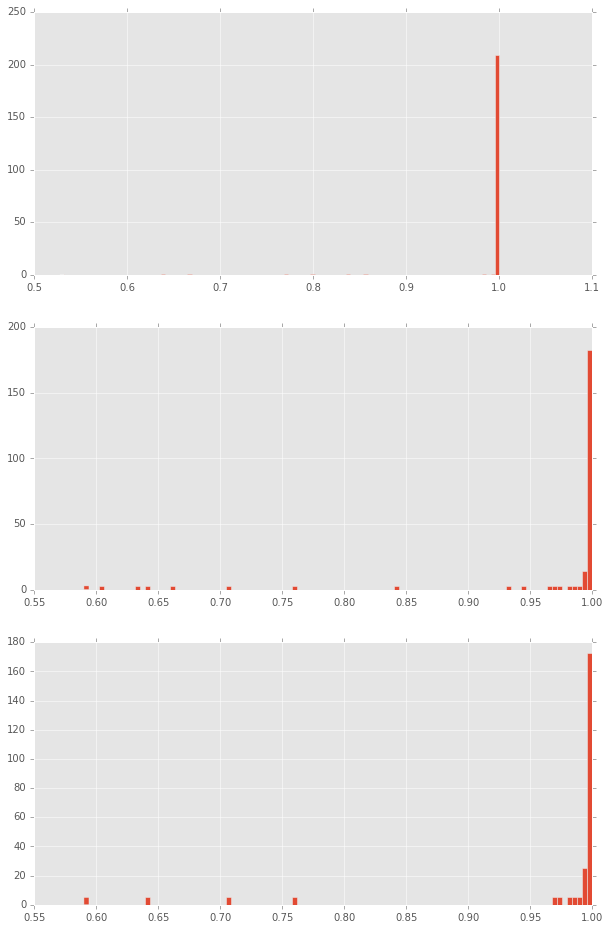

In [25]:
eq = (val_s==pred_s)
neq = (val_s!=pred_s)
nse = val_s==0
print prob.shape
print prob[eq].shape
print prob[neq].shape
print prob[nse].shape
plt.subplot(3,1,1)
_=plt.hist(prob[eq].max(axis=1), bins=100, normed=True)
print (prob[eq].max(axis=1)==1).mean()
plt.subplot(3,1,2)
_=plt.hist(prob[neq].max(axis=1), bins=100, normed=True)
print (prob[neq].max(axis=1)==1).mean()
plt.subplot(3,1,3)
_=plt.hist(prob[nse].max(axis=1), bins=100, normed=True)
print (prob[nse].max(axis=1)==1).mean()

In [13]:
clf_r = MultinomialNB(alpha=0.0001, fit_prior=False)
clf_r.fit(train_X, train_r)
pred_r = clf_r.predict(val_X)
print f1_score(val_r, pred_r, average='micro')
print f1_score(val_r, pred_r, average='macro')
print f1_score(val_r, pred_r, average='weighted')

0.729358457998
0.356707153055
0.754687479713


In [113]:
print "Took %f s" % (time.time()-start)

Took 153.973458 s


In [77]:
norm_coef = clf_s.coef_/np.abs(clf_s.coef_.sum(axis=1))[:,None]
clf_s2 = clf_s
clf_s2.feature_log_prob_ = norm_coef
pred_s = clf_s2.predict(val_X)
print f1_score(val_s, pred_s, average='micro')
print f1_score(val_s, pred_s, average='macro')
print f1_score(val_s, pred_s, average='weighted')

0.778265247411
0.404764224748
0.716247002231


In [15]:
norm_coef = clf_r.coef_/np.abs(clf_r.coef_.sum(axis=1))[:,None]
clf_r2 = clf_r
clf_r2.feature_log_prob_ = norm_coef
pred_r = clf_r2.predict(val_X)
print f1_score(val_r, pred_r, average='micro')
print f1_score(val_r, pred_r, average='macro')
print f1_score(val_r, pred_r, average='weighted')

0.73834867664
0.34077063269
0.746629219563
